# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble

### Understanding the data

In [2]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


In [6]:
df.groupby('Churn').std()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.334923,24.113777,31.092648
Yes,0.435799,19.531123,24.666053


In [7]:
df.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

In [8]:
# df.isnull().any().sum()

In [9]:
print(df.tenure.sort_values().unique())
len(df.tenure.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


73

In [10]:
print(df.MultipleLines.unique())

['No phone service' 'No' 'Yes']


In [11]:
for col in df.columns:
    print(df[col].unique())
    print(len(df[col].unique()))
    print(col,'.........................')

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7043
customerID .........................
['Female' 'Male']
2
gender .........................
[0 1]
2
SeniorCitizen .........................
['Yes' 'No']
2
Partner .........................
['No' 'Yes']
2
Dependents .........................
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
73
tenure .........................
['No' 'Yes']
2
PhoneService .........................
['No phone service' 'No' 'Yes']
3
MultipleLines .........................
['DSL' 'Fiber optic' 'No']
3
InternetService .........................
['No' 'Yes' 'No internet service']
3
OnlineSecurity .........................
['Yes' 'No' 'No internet service']
3
OnlineBackup .........................
['No' 'Yes' 'No internet service']
3
DeviceProtection ....

## Data Manipulation

In [12]:
# tenure, MonthlyCharges, TotalCharges
category_list = []
for col in df.columns:
    if len(df[col].unique()) <= 73:
        df[col] = df[col].astype('category')
        category_list.append(col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null category
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null cate

In [13]:
data = df.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [15]:
df_encode = MultiColumnLabelEncoder(columns=category_list).fit_transform(df)
df_encode.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
df_encode['TotalCharges'] = df_encode['TotalCharges'].replace(' ',0)

In [17]:
df_encode['TotalCharges'] = df_encode['TotalCharges'].astype('float64', errors='raise')

In [18]:
months =  [tc//mc if tc/mc == tc//mc else (tc//mc)+1 for tc,mc in zip(df_encode['TotalCharges'],df_encode['MonthlyCharges'])]
df_encode['months'] = months

In [19]:
df_encode.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,months
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1.0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,34.0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,3.0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,44.0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,3.0


In [62]:
data = df_encode.set_index('customerID')
# df_encode.groupby('Churn').pct_change()

In [65]:
print(data.groupby('Churn').mean())
data.groupby('Churn').std()

             index    gender  SeniorCitizen   Partner  Dependents     tenure  \
Churn                                                                          
0      3508.431001  0.507344       0.128721  0.528218    0.344801  37.569965   
1      3555.795078  0.497592       0.254682  0.357945    0.174425  17.979133   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
Churn                                                                ...   
0          0.901044       0.918825         0.893893        0.939505  ...   
1          0.909042       1.000535         0.814874        0.376137  ...   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
Churn                                                                          
0              0.998647     0.943371     1.004832         1.012949  0.889254   
1              0.643660     0.392188     0.931514         0.935795  0.140182   

       PaperlessBilling  PaymentMethod  MonthlyCharge

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,months
Churn,,,,,,,,,,,,,,,,,,,,,
0,2031.712630,0.499994,0.334923,0.499251,0.475349,24.113777,0.298632,0.945847,0.800728,0.850520,...,0.852668,0.850786,0.852655,0.852571,0.857478,0.498782,1.118647,31.092648,2329.954215,24.193530
1,2037.765072,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.953692,0.521459,0.742044,...,0.901663,0.755255,0.967135,0.967429,0.414714,0.433668,0.886617,24.666053,1890.822994,19.647016


In [69]:
for col in category_list:
    print(data.groupby('Churn')[col].value_counts())
#     break

Churn  gender
0      1         2625
       0         2549
1      0          939
       1          930
Name: gender, dtype: int64
Churn  SeniorCitizen
0      0                4508
       1                 666
1      0                1393
       1                 476
Name: SeniorCitizen, dtype: int64
Churn  Partner
0      1          2733
       0          2441
1      0          1200
       1           669
Name: Partner, dtype: int64
Churn  Dependents
0      0             3390
       1             1784
1      0             1543
       1              326
Name: Dependents, dtype: int64
Churn  tenure
0      72        356
       1         233
       71        164
       2         115
       70        108
       3         106
       4          93
       68         91
       67         88
       69         87
       8          81
       7          80
       12         79
       64         76
       66         76
       9          73
       18         73
       35         73
       23         72

In [20]:
df_encode.corr()
# df_encode.corr().index

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,months
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,...,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612,0.004189
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,...,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889,0.016400
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,...,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448,0.379842
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,...,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221,0.159060
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,...,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229,0.998846
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,...,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942,0.008459
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,...,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037,0.343393
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,...,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291,-0.030146
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,...,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309,0.325711
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,...,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525,0.370170


In [21]:
max(df_encode.corr())

'tenure'

In [22]:
features_list = []
for col in df_encode.corr().index:
    if (df_encode['Churn'].corr(df_encode[col]) > 0.1) or (df_encode['Churn'].corr(df_encode[col]) < -0.1) :
        features_list.append(col)

In [23]:
features_list

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'months']

In [118]:
# df_encode['Churn'].corr(df_encode['gender']) > 0.1

## Data Visualization

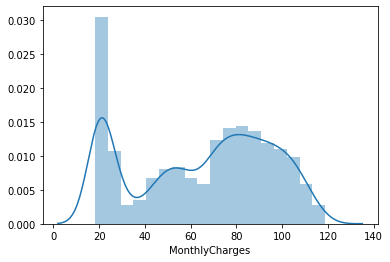

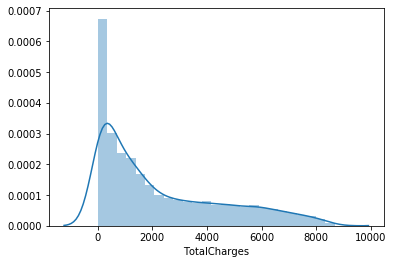

In [24]:
sb.distplot(df.MonthlyCharges)
plt.show()
sb.distplot(df_encode.TotalCharges)
plt.show()

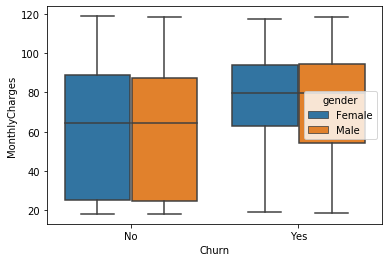

In [25]:
sb.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='gender')
plt.show()

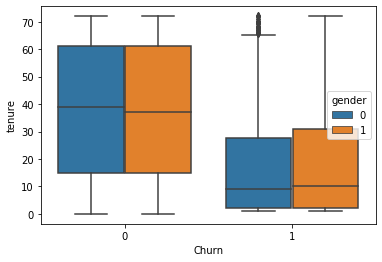

In [27]:
sb.boxplot(x='Churn', y='tenure', data=df_encode, hue='gender')
plt.show()

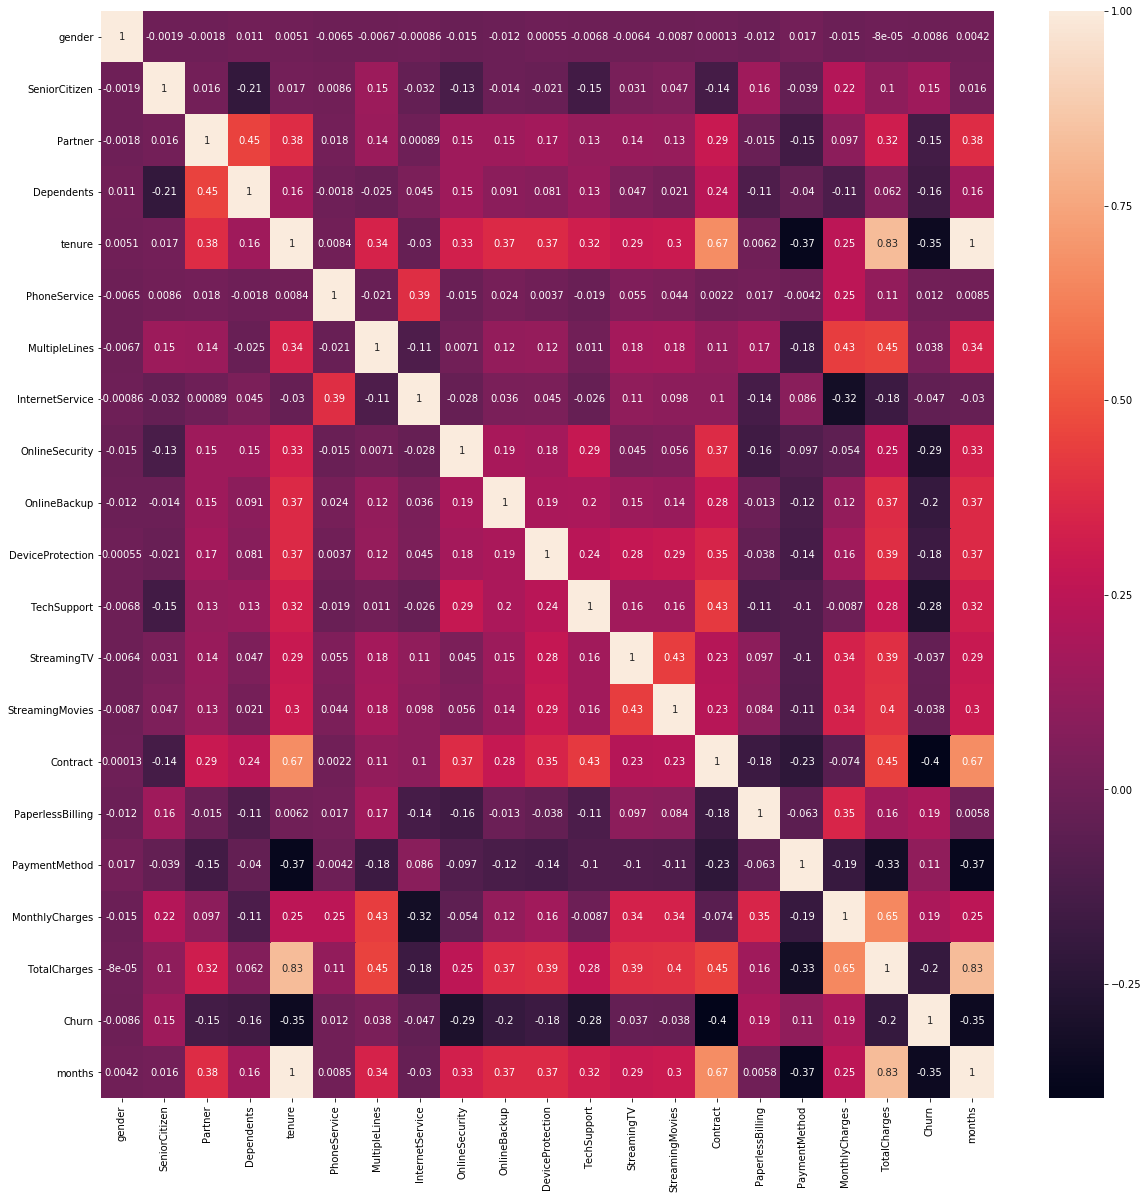

In [28]:
corr = df_encode.corr().index
plt.figure(figsize=(20,20))
sb.heatmap(df_encode[corr].corr(), annot=True)

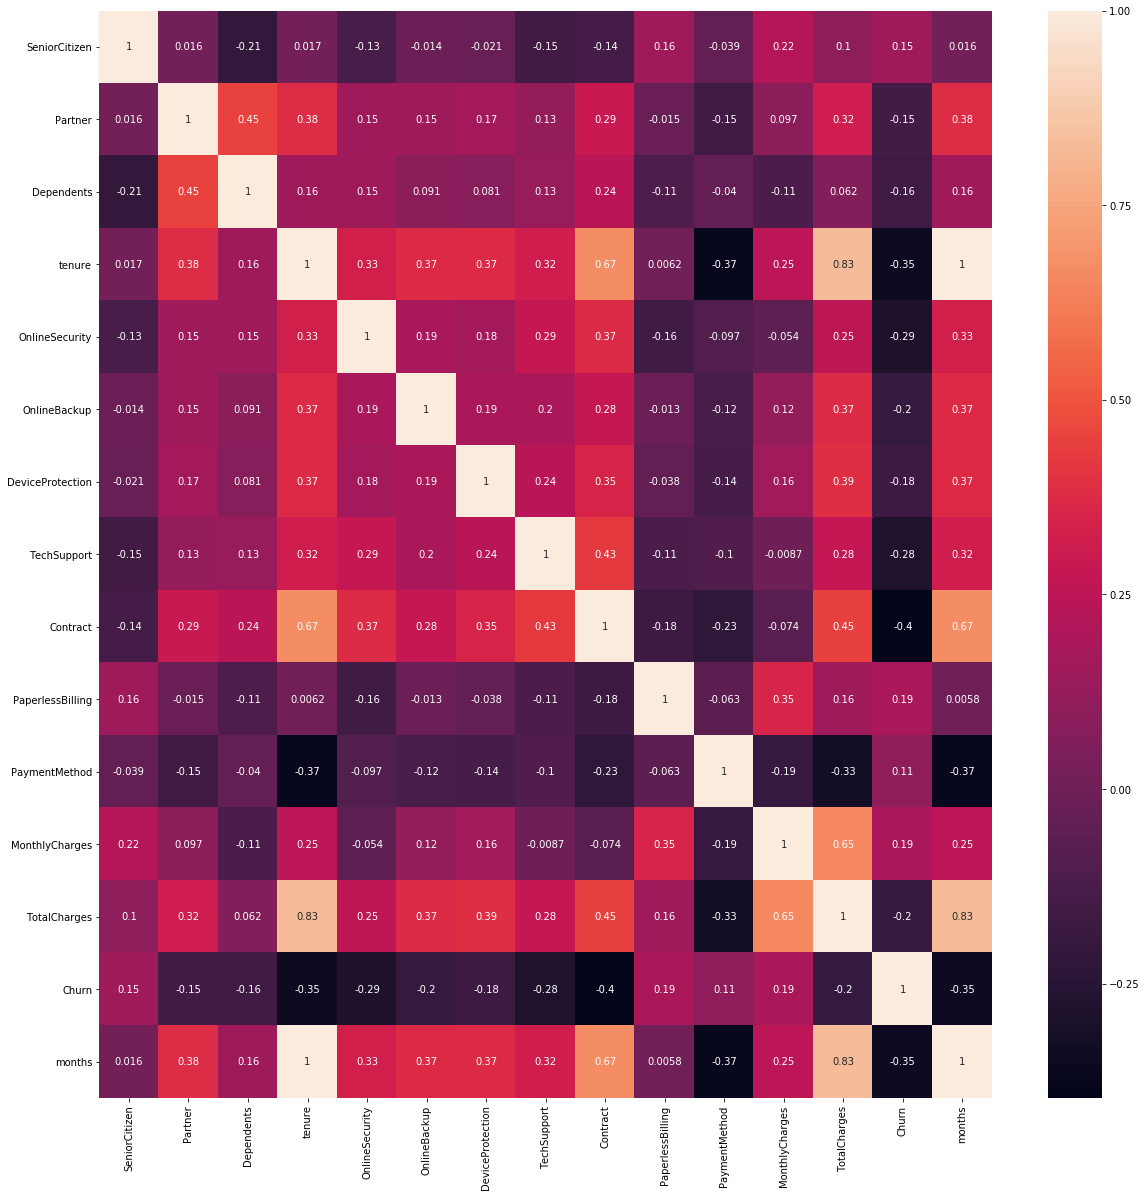

In [29]:
# feature variables which are highly correlated with taget variable(relatively)
plt.figure(figsize=(20,20))
sb.heatmap(df_encode[features_list].corr(), annot=True)

In [1]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

#### LogisticRegression Model

In [30]:
df_encode.reset_index(inplace=True)

In [31]:
X = df_encode[features_list].drop('Churn', axis=1)
y = df_encode['Churn']

In [32]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y, test_size=0.3, random_state=1)

In [33]:
churn_clf = linear_model.LogisticRegression()
churn_clf.fit(X_train,y_train)

C:\Users\samya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
churn_pred = churn_clf.predict(X_test)

In [35]:
churn_score = metrics.accuracy_score(y_test, churn_pred)
churn_score

0.807382867960246

#### DecisionTreeClassifier Model (Random Forest)

In [36]:
churn_dtc = tree.DecisionTreeClassifier()
churn_dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
churn_dtc_pred = churn_dtc.predict(X_test)

In [38]:
# churn_dtc.score(y_test, churn_dtc_pred)

In [39]:
churn_dtc_score = metrics.accuracy_score(y_test,churn_dtc_pred)
churn_dtc_score

0.735447231424515

#### Support Vector Classification

In [40]:
churn_svc = svm.SVC()
churn_svc.fit(X_train,y_train)

C:\Users\samya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
churn_svc_pred = churn_svc.predict(X_test)

In [42]:
churn_svc.score(X_test, y_test)

0.7780407004259347

In [43]:
churn_svc_score = metrics.accuracy_score(y_test, churn_svc_pred)
churn_svc_score

0.7780407004259347

#### RandomForestClassifier Model

In [44]:
churn_rfc = ensemble.RandomForestClassifier()

In [45]:
churn_rfc.fit(X_train,y_train)

C:\Users\samya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
churn_feature_imp = churn_rfc.feature_importances_
churn_feature_imp

array([0.02203766, 0.02250002, 0.01848613, 0.11126568, 0.02929281,
       0.03341099, 0.02273491, 0.03435186, 0.12343811, 0.02251913,
       0.04954697, 0.20080053, 0.18198185, 0.12763335])

In [47]:
sorted_index = np.argsort(churn_feature_imp)
sorted_index

array([ 2,  0,  1,  9,  6,  4,  5,  7, 10,  3,  8, 13, 12, 11],
      dtype=int64)

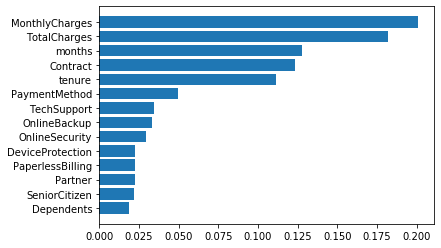

In [48]:
labels = X.columns[sorted_index]
plt.barh(range(X.shape[1]), churn_feature_imp[sorted_index], tick_label = labels)
plt.show()

In [49]:
churn_rfc.score(X_test, y_test)

0.7969711310932324

In [50]:
y_pred_rfc = churn_rfc.predict(X_test)

In [51]:
metrics.f1_score(y_test, y_pred_rfc)

0.555440414507772

### Model Evaluation

In [52]:
y_pred_proba = churn_clf.predict_proba(X_test)
y_pred_proba

array([[0.91498036, 0.08501964],
       [0.83656431, 0.16343569],
       [0.49951486, 0.50048514],
       ...,
       [0.29817003, 0.70182997],
       [0.9844444 , 0.0155556 ],
       [0.97466738, 0.02533262]])

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])
print('fpr: ',fpr,'\n tpr: ' ,tpr, '\n thresholds: ', thresholds)

fpr:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.30914826e-04
 6.30914826e-04 1.26182965e-03 1.26182965e-03 1.89274448e-03
 1.89274448e-03 2.52365931e-03 2.52365931e-03 3.78548896e-03
 3.78548896e-03 4.41640379e-03 4.41640379e-03 5.04731861e-03
 5.04731861e-03 6.30914826e-03 6.30914826e-03 6.94006309e-03
 6.94006309e-03 8.83280757e-03 8.83280757e-03 9.46372240e-03
 9.46372240e-03 1.00946372e-02 1.07255521e-02 1.07255521e-02
 1.07255521e-02 1.07255521e-02 1.13564669e-02 1.13564669e-02
 1.19873817e-02 1.19873817e-02 1.32492114e-02 1.32492114e-02
 1.57728707e-02 1.57728707e-02 1.64037855e-02 1.64037855e-02
 1.70347003e-02 1.70347003e-02 1.76656151e-02 1.76656151e-02
 1.82965300e-02 1.82965300e-02 2.14511041e-02 2.14511041e-02
 2.33438486e-02 2.33438486e-02 2.39747634e-02 2.39747634e-02
 2.46056782e-02 2.46056782e-02 2.58675079e-02 2.58675079e-02
 2.71293375e-02 2.71293375e-02 2.77602524e-02 2.77602524e-02
 2.90220820e-02 2.90220820e-02 2.96529968e-02 2.96529968e-02
 3.02839117e-02 3.

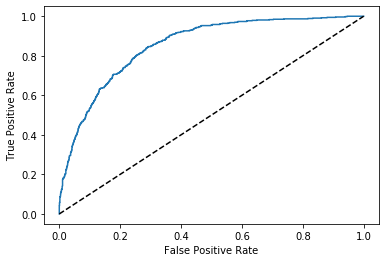

In [54]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1], [0,1], "k--")
plt.show()

In [55]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.8526067058598604

In [56]:
param_grid = {'max_features':['auto', 'sqrt', 'log2']}
grid_search = model_selection.GridSearchCV(churn_dtc, param_grid)

In [57]:
grid_search.fit(X,y)

C:\Users\samya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [58]:
grid_search.best_params_

{'max_features': 'log2'}

In [59]:
grid_search.best_score_

0.7386057077949737

### Final Conclusions

In [175]:
# This indicates that this baseline LogisticRegression classifier is quite good!


### Demo